In [1]:
# Install packages
%pip install networkx
%pip install numpy
%pip install tqdm
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# For sdp_algorithm

# %pip install cmake
# %pip install ecos==2.0.5
# %pip install cvxpy

In [3]:
# The starter code is short and simple, take a look!

from starter import *

import random

In [4]:
import importlib
import starter
import greedy_algorithm
#import sdp_algorithm
importlib.reload(starter)
importlib.reload(greedy_algorithm)
#importlib.reload(sdp_algorithm)
from starter import *
from greedy_algorithm import *
#from sdp_algorithm import *

# Phase 1 - Create Inputs

In [5]:
# Add edges with G.add_edge(u, v, weight=w)
# Idea: consider making the inputs with a solution in mind, 
# such that you know the solution when the outputs are released

def small(G: nx.Graph):
    # Each even node connects to each odd node, with 'random' weight
    # Optimal Solution: Partition into odd and even teams
    for i in range(100):
        for j in range(i + 1, (100 - i) // 2):
            G.add_edge(i, i + 2 * j, weight=min(int(math.sin(i + j) * 500 + 850), int(math.cos(2 * j + i) * 500 + 850), 1000))
    
def medium(G: nx.Graph):
    # Each node connects to its first 20 multiples, with the closer multiples having larger weights
    # Optimal Solution: Partition such that co-primeness between groups are maximized
    for i in range(300):
        for j in range(20):
            if i != (i * j) % 300:
                G.add_edge(i, (i * j) % 300, weight=40 * (20 - j + 1))
    
def large(G: nx.Graph):
    # Completely random graph, where each node has between 5 and 15 edges, to any other node with random weight
    # Optimal Solution: Unknown
    for i in range(1000):
        for _ in range(random.randint(5, 15)):
            j = random.randint(1, 999)
            if i != j:
                G.add_edge(i, j, weight=random.randint(1, 1000))

# Phase 2 - Implement your Solver

In [6]:
from greedy_algorithm import *

In [7]:
def random_solve(G: nx.Graph):
    """Randomly partitions G into a random number of teams."""
    k = random.randint(5, 10)
    max_per_team = len(G.nodes) / k
    teams = [0 for _ in range(k)]
    for v in G.nodes:
        look_for_team = True
        while look_for_team:
            this_team = random.randint(1, k)
            if teams[this_team - 1] < max_per_team:
                G.nodes[v]['team'] = this_team
                teams[this_team - 1] += 1
                look_for_team = False

In [8]:
def current_solve(in_file):
    def current_solve_helper(G: nx.Graph):
        file_name = in_file[in_file.index("/") + 1:]
        file_name = file_name[:file_name.index("in")]
        instance = read_input(in_file)
        current_solution = read_output(instance, "outputs" + "/" + file_name + "out")
        for v in G.nodes:
            G.nodes[v]['team'] = current_solution.nodes[v]['team']
    return current_solve_helper

In [9]:
def solve(G: nx.Graph):
    
    # TODO: Simulated Annealing
        # TODO: Try updating specific nodes, and seeing which changes to make based on homework 11 algorithm
        # TODO: Decrease the amount of nodes updated as time goes on
        # TODO: Do these steps for k-1, k, and k+1, pick the best

    k = optimize_k(G)
    G = max_k_cut_solve(k)(G)

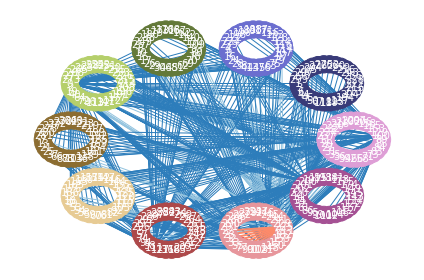

current_solve_helper 44706.31591025766


In [19]:
# TODO: Write a function that fetches a random input to test on

input = 'inputs/medium6.in'

solvers = [current_solve(input)]

for solver in solvers:
    G = read_input(input)

    k = solver(G)
    validate_output(G)
    visualize(G)
    print(solver.__name__, score(G))

In [12]:
# TODO: Write a function that can separate which inputs to run, given a class (small, medium, large) and range of numbers

for _ in range(1000):   
    run_all(random_solve, 'inputs', 'outputs')

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 70119.81500331442
inputs/small232.in: cost 91823.24939607034
inputs/large116.in: cost 152009.6900202268
inputs/large59.in: cost 169739.6900202268
inputs/small150.in: cost 396440.2493960704
inputs/large147.in: cost 512768.31591025763
inputs/small101.in: cost 474342.2493960704
inputs/small197.in: cost 366409.1432152336
inputs/small206.in: cost 105881.79776051317
inputs/large240.in: cost 870421.6900202268
inputs/medium7.in: cost 994264.7863288914
inputs/small257.in: cost 434096.1432152336
inputs/large180.in: cost 662414.1310930826
inputs/large211.in: cost 993823.2493960704
inputs/small135.in: cost 346106.5478183665
inputs/small68.in: cost 201244.24939607034
inputs/medium249.in: cost 91570.78632889136
inputs/large173.in: cost 77894.6900202268
inputs/small164.in: cost 243030.41896328292
inputs/medium218.in: cost 68842.31591025766
inputs/medium189.in: cost 82861.31591025766
inputs/small39.in: cost 59307.60817510197
inputs/large122.in: cost 136812.61214938603
inputs/m

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 68533.11092552818
inputs/small232.in: cost 63745.31591025766
inputs/large116.in: cost 120460.81500331442
inputs/large59.in: cost 147032.61214938603
inputs/small150.in: cost 216361.31591025766
inputs/large147.in: cost 840011.6900202268
inputs/small101.in: cost 344520.5478183665
inputs/small197.in: cost 236584.31591025766
inputs/small206.in: cost 82936.36969444754
inputs/large240.in: cost 737269.6121493861
inputs/medium7.in: cost 1002328.7863288914
inputs/small257.in: cost 292362.6663945133
inputs/large180.in: cost 738464.8150033144
inputs/large211.in: cost 502065.31591025763
inputs/small135.in: cost 242941.31591025766
inputs/small68.in: cost 119966.05597958248
inputs/medium249.in: cost 93267.55369231876
inputs/large173.in: cost 71879.81500331442
inputs/small164.in: cost 221582.31591025766
inputs/medium218.in: cost 104619.24939607034
inputs/medium189.in: cost 90424.31591025766
inputs/small39.in: cost 89334.14321523352
inputs/large122.in: cost 120842.31591025766
i

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 83127.40862222019
inputs/small232.in: cost 51468.31591025766
inputs/large116.in: cost 216219.24939607034
inputs/large59.in: cost 169719.6900202268
inputs/small150.in: cost 248598.5391960796
inputs/large147.in: cost 615093.8150033144
inputs/small101.in: cost 300441.0570147277
inputs/small197.in: cost 277153.0570147277
inputs/small206.in: cost 87882.99249281183
inputs/large240.in: cost 866501.6900202268
inputs/medium7.in: cost 783980.4562993493
inputs/small257.in: cost 324046.0570147277
inputs/large180.in: cost 1022703.6900202268
inputs/large211.in: cost 722879.6121493861
inputs/small135.in: cost 297189.0570147277
inputs/small68.in: cost 131870.5391960796
inputs/medium249.in: cost 58516.31591025766
inputs/large173.in: cost 62336.31591025766
inputs/small164.in: cost 366623.7977605132
inputs/medium218.in: cost 68912.78632889136
inputs/medium189.in: cost 152015.24939607034
inputs/small39.in: cost 97155.24939607034
inputs/large122.in: cost 166509.6900202268
inputs/me

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 91734.24939607034
inputs/small232.in: cost 53210.31591025766
inputs/large116.in: cost 210219.24939607034
inputs/large59.in: cost 121143.20710728243
inputs/small150.in: cost 405558.2493960704
inputs/large147.in: cost 591997.91481759
inputs/small101.in: cost 480927.2493960704
inputs/small197.in: cost 471503.2493960704
inputs/small206.in: cost 76637.31591025766
inputs/large240.in: cost 736637.6121493861
inputs/medium7.in: cost 1163369.5536923187
inputs/small257.in: cost 323455.36969444755
inputs/large180.in: cost 976439.6378778446
inputs/large211.in: cost 722427.6121493861
inputs/small135.in: cost 299475.36969444755
inputs/small68.in: cost 124930.78636752511
inputs/medium249.in: cost 72000.10734021418
inputs/large173.in: cost 59746.1507392881
inputs/small164.in: cost 223308.31591025766
inputs/medium218.in: cost 85409.55369231876
inputs/medium189.in: cost 126786.55369231876
inputs/small39.in: cost 86607.14321523352
inputs/large122.in: cost 153960.81500331443
inputs

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 104417.24939607034
inputs/small232.in: cost 60498.60817510197
inputs/large116.in: cost 102842.31591025766
inputs/large59.in: cost 129840.81500331442
inputs/small150.in: cost 205309.31591025766
inputs/large147.in: cost 822710.6900202268
inputs/small101.in: cost 280179.7863675251
inputs/small197.in: cost 310950.20038610406
inputs/small206.in: cost 73918.66639451329
inputs/large240.in: cost 534213.3159102576
inputs/medium7.in: cost 1033408.7863288914
inputs/small257.in: cost 523869.2493960704
inputs/large180.in: cost 686754.0464508269
inputs/large211.in: cost 957515.2493960704
inputs/small135.in: cost 244679.31591025766
inputs/small68.in: cost 199733.24939607034
inputs/medium249.in: cost 88454.78632889136
inputs/large173.in: cost 53781.31591025766
inputs/small164.in: cost 220964.31591025766
inputs/medium218.in: cost 58203.804595073125
inputs/medium189.in: cost 129328.55369231876
inputs/small39.in: cost 88756.79776051317
inputs/large122.in: cost 117342.31591025766


  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 57184.40862222018
inputs/small232.in: cost 106432.24939607034
inputs/large116.in: cost 141312.61214938603
inputs/large59.in: cost 114952.31591025766
inputs/small150.in: cost 274533.12506384565
inputs/large147.in: cost 647615.8150033144
inputs/small101.in: cost 293352.5391960796
inputs/small197.in: cost 450769.2493960704
inputs/small206.in: cost 126848.24939607034
inputs/large240.in: cost 517501.31591025763
inputs/medium7.in: cost 762454.25610169
inputs/small257.in: cost 523911.2493960704
inputs/large180.in: cost 1181780.2493960704
inputs/large211.in: cost 633155.8150033144
inputs/small135.in: cost 241308.31591025766
inputs/small68.in: cost 175238.79776051317
inputs/medium249.in: cost 66794.70061041453
inputs/large173.in: cost 63979.81500331443
inputs/small164.in: cost 357312.1432152336
inputs/medium218.in: cost 90609.55369231876
inputs/medium189.in: cost 134918.55369231876
inputs/small39.in: cost 64141.057014727674
inputs/large122.in: cost 122842.31591025766
in

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 79452.61214938603
inputs/small232.in: cost 68856.53919607958
inputs/large116.in: cost 156312.61214938603
inputs/large59.in: cost 120143.40862222019
inputs/small150.in: cost 254818.8702032813
inputs/large147.in: cost 570383.2071072825
inputs/small101.in: cost 283866.5391960796
inputs/small197.in: cost 226276.31591025766
inputs/small206.in: cost 75196.31591025766
inputs/large240.in: cost 533422.3159102576
inputs/medium7.in: cost 799729.4562993493
inputs/small257.in: cost 370186.6539248577
inputs/large180.in: cost 741939.8150033144
inputs/large211.in: cost 501268.31591025763
inputs/small135.in: cost 341018.6539248577
inputs/small68.in: cost 152244.28397252137
inputs/medium249.in: cost 68104.31591025766
inputs/large173.in: cost 97336.24939607034
inputs/small164.in: cost 438079.2493960704
inputs/medium218.in: cost 82209.55369231876
inputs/medium189.in: cost 100240.74973050374
inputs/small39.in: cost 74398.14321523352
inputs/large122.in: cost 112342.31591025766
input

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 65909.31591025766
inputs/small232.in: cost 57439.46918416806
inputs/large116.in: cost 137312.61214938603
inputs/large59.in: cost 202239.24939607034
inputs/small150.in: cost 206733.31591025766
inputs/large147.in: cost 623305.8150033144
inputs/small101.in: cost 247363.31591025766
inputs/small197.in: cost 317743.12506384565
inputs/small206.in: cost 69015.60817510197
inputs/large240.in: cost 1023591.2493960704
inputs/medium7.in: cost 1416611.2493960704
inputs/small257.in: cost 523912.2493960704
inputs/large180.in: cost 641588.4086222202
inputs/large211.in: cost 959055.2493960704
inputs/small135.in: cost 244520.31591025766
inputs/small68.in: cost 114544.7738008533
inputs/medium249.in: cost 65397.58600906638
inputs/large173.in: cost 59730.40862222018
inputs/small164.in: cost 310662.12506384565
inputs/medium218.in: cost 75512.78632889136
inputs/medium189.in: cost 132980.55369231876
inputs/small39.in: cost 104272.24939607034
inputs/large122.in: cost 156312.61214938603


  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 101727.24939607034
inputs/small232.in: cost 61095.36969444755
inputs/large116.in: cost 145312.61214938603
inputs/large59.in: cost 114842.31591025766
inputs/small150.in: cost 287194.20038610406
inputs/large147.in: cost 813404.6900202268
inputs/small101.in: cost 395574.1432152336
inputs/small197.in: cost 320914.5478183665
inputs/small206.in: cost 82443.78636752511
inputs/large240.in: cost 535022.3159102576
inputs/medium7.in: cost 666593.3159102576
inputs/small257.in: cost 262396.31591025763
inputs/large180.in: cost 660587.3159102576
inputs/large211.in: cost 804593.6900202268
inputs/small135.in: cost 306893.5391960796
inputs/small68.in: cost 155414.65392485767
inputs/medium249.in: cost 68896.78632889136
inputs/large173.in: cost 61572.1507392881
inputs/small164.in: cost 224082.31591025766
inputs/medium218.in: cost 64442.31591025766
inputs/medium189.in: cost 110942.20921347641
inputs/small39.in: cost 56974.31591025766
inputs/large122.in: cost 166509.6900202268
input

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 62634.31591025766
inputs/small232.in: cost 91287.14321523352
inputs/large116.in: cost 101003.1507392881
inputs/large59.in: cost 120283.29471466366
inputs/small150.in: cost 253959.5391960796
inputs/large147.in: cost 976314.2493960704
inputs/small101.in: cost 293850.36969444755
inputs/small197.in: cost 434019.2493960704
inputs/small206.in: cost 73779.36969444754
inputs/large240.in: cost 884357.6900202268
inputs/medium7.in: cost 1182061.5536923187
inputs/small257.in: cost 293492.18633179966
inputs/large180.in: cost 1216073.2493960704
inputs/large211.in: cost 602841.8150033144
inputs/small135.in: cost 343230.12506384565
inputs/small68.in: cost 106476.31591025766
inputs/medium249.in: cost 79181.55369231876
inputs/large173.in: cost 61733.61214938603
inputs/small164.in: cost 263288.36969444755
inputs/medium218.in: cost 63805.45629934925
inputs/medium189.in: cost 133209.55369231876
inputs/small39.in: cost 90278.24939607034
inputs/large122.in: cost 182719.24939607034
in

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 74104.81500331442
inputs/small232.in: cost 81885.79776051317
inputs/large116.in: cost 132003.04645082692
inputs/large59.in: cost 115022.31591025766
inputs/small150.in: cost 210556.31591025766
inputs/large147.in: cost 583617.4086222202
inputs/small101.in: cost 490034.2493960704
inputs/small197.in: cost 230799.31591025766
inputs/small206.in: cost 69766.66639451329
inputs/large240.in: cost 525701.3159102576
inputs/medium7.in: cost 1423514.2493960704
inputs/small257.in: cost 370203.6539248577
inputs/large180.in: cost 804663.8150033144
inputs/large211.in: cost 576696.8150033144
inputs/small135.in: cost 299876.8702032812
inputs/small68.in: cost 127796.53919607958
inputs/medium249.in: cost 110095.24939607034
inputs/large173.in: cost 77545.61214938603
inputs/small164.in: cost 266122.36969444755
inputs/medium218.in: cost 59804.10734021417
inputs/medium189.in: cost 155398.24939607034
inputs/small39.in: cost 62916.31591025766
inputs/large122.in: cost 144812.61214938603
in

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 73257.81500331442
inputs/small232.in: cost 55226.31591025766
inputs/large116.in: cost 146009.6900202268
inputs/large59.in: cost 115032.31591025766
inputs/small150.in: cost 240771.8702032813
inputs/large147.in: cost 603189.8150033144
inputs/small101.in: cost 334656.0883757614
inputs/small197.in: cost 438170.2493960704
inputs/small206.in: cost 128762.24939607034
inputs/large240.in: cost 1040841.2493960704
inputs/medium7.in: cost 1180984.5536923187
inputs/small257.in: cost 262629.31591025763
inputs/large180.in: cost 640710.0687101044
inputs/large211.in: cost 557802.2947146636
inputs/small135.in: cost 395636.1432152336
inputs/small68.in: cost 115576.31591025766
inputs/medium249.in: cost 108241.24939607034
inputs/large173.in: cost 73603.81500331442
inputs/small164.in: cost 363656.1432152336
inputs/medium218.in: cost 73712.78632889136
inputs/medium189.in: cost 113464.78632889136
inputs/small39.in: cost 86293.14321523352
inputs/large122.in: cost 121960.81500331442
inp

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 65535.06871010444
inputs/small232.in: cost 60775.60817510197
inputs/large116.in: cost 136842.31591025766
inputs/large59.in: cost 130810.81500331442
inputs/small150.in: cost 274489.12506384565
inputs/large147.in: cost 1006700.2493960704
inputs/small101.in: cost 236788.31591025766
inputs/small197.in: cost 312108.6539248577
inputs/small206.in: cost 85115.41896328294
inputs/large240.in: cost 751375.6121493861
inputs/medium7.in: cost 794382.1073402142
inputs/small257.in: cost 262565.31591025763
inputs/large180.in: cost 718162.1507392881
inputs/large211.in: cost 515046.31591025763
inputs/small135.in: cost 303717.5061018658
inputs/small68.in: cost 135795.5391960796
inputs/medium249.in: cost 81739.55369231876
inputs/large173.in: cost 120546.24939607034
inputs/small164.in: cost 448760.2493960704
inputs/medium218.in: cost 101419.24939607034
inputs/medium189.in: cost 120949.55369231876
inputs/small39.in: cost 67216.41896328294
inputs/large122.in: cost 215719.24939607034
i

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 63744.31591025766
inputs/small232.in: cost 68235.65392485766
inputs/large116.in: cost 223219.24939607034
inputs/large59.in: cost 121223.02322925419
inputs/small150.in: cost 284656.6539248577
inputs/large147.in: cost 818074.6900202268
inputs/small101.in: cost 241095.31591025766
inputs/small197.in: cost 455172.2493960704
inputs/small206.in: cost 70644.18633179963
inputs/large240.in: cost 522405.31591025763
inputs/medium7.in: cost 998677.7863288914
inputs/small257.in: cost 323256.36969444755
inputs/large180.in: cost 763740.8150033144
inputs/large211.in: cost 599777.8150033144
inputs/small135.in: cost 308208.5391960796
inputs/small68.in: cost 112202.31591025766
inputs/medium249.in: cost 93806.78632889136
inputs/large173.in: cost 105415.24939607034
inputs/small164.in: cost 260198.8702032813
inputs/medium218.in: cost 79312.78632889136
inputs/medium189.in: cost 158909.24939607034
inputs/small39.in: cost 78355.12506384567
inputs/large122.in: cost 133960.81500331443
inp

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 82568.6900202268
inputs/small232.in: cost 56163.31591025766
inputs/large116.in: cost 170009.6900202268
inputs/large59.in: cost 169929.6900202268
inputs/small150.in: cost 196121.31591025766
inputs/large147.in: cost 537401.2947146636
inputs/small101.in: cost 334038.6539248577
inputs/small197.in: cost 244012.05597958248
inputs/small206.in: cost 64375.0883757614
inputs/large240.in: cost 861802.6900202268
inputs/medium7.in: cost 794136.7006104145
inputs/small257.in: cost 262422.31591025763
inputs/large180.in: cost 853554.8150033144
inputs/large211.in: cost 493441.31591025763
inputs/small135.in: cost 246050.31591025766
inputs/small68.in: cost 132602.36969444755
inputs/medium249.in: cost 100271.24939607034
inputs/large173.in: cost 63252.81500331443
inputs/small164.in: cost 273032.8702032812
inputs/medium218.in: cost 80912.78632889136
inputs/medium189.in: cost 95716.45629934926
inputs/small39.in: cost 49801.31591025766
inputs/large122.in: cost 131312.61214938603
inputs

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 107381.24939607034
inputs/small232.in: cost 98179.24939607034
inputs/large116.in: cost 133460.81500331443
inputs/large59.in: cost 201389.24939607034
inputs/small150.in: cost 318317.1432152336
inputs/large147.in: cost 976395.2493960704
inputs/small101.in: cost 276364.5717318357
inputs/small197.in: cost 320785.12506384565
inputs/small206.in: cost 75939.31591025766
inputs/large240.in: cost 579446.4086222202
inputs/medium7.in: cost 981574.7863288914
inputs/small257.in: cost 433365.7977605132
inputs/large180.in: cost 979977.6900202268
inputs/large211.in: cost 1023024.2493960704
inputs/small135.in: cost 343619.6539248577
inputs/small68.in: cost 132698.8702032813
inputs/medium249.in: cost 66971.45629934926
inputs/large173.in: cost 60201.81500331443
inputs/small164.in: cost 367100.1432152336
inputs/medium218.in: cost 88209.55369231876
inputs/medium189.in: cost 159100.24939607034
inputs/small39.in: cost 64433.28397252138
inputs/large122.in: cost 175009.63787784462
input

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 97145.24939607034
inputs/small232.in: cost 67470.5478183665
inputs/large116.in: cost 119003.40862222019
inputs/large59.in: cost 130800.81500331442
inputs/small150.in: cost 286430.5478183665
inputs/large147.in: cost 709323.6121493861
inputs/small101.in: cost 308097.8702032812
inputs/small197.in: cost 465637.2493960704
inputs/small206.in: cost 83809.5478183665
inputs/large240.in: cost 639755.8150033144
inputs/medium7.in: cost 880946.7497305038
inputs/small257.in: cost 325769.5391960796
inputs/large180.in: cost 930431.6121493861
inputs/large211.in: cost 974136.2493960704
inputs/small135.in: cost 341836.12506384565
inputs/small68.in: cost 136598.5391960796
inputs/medium249.in: cost 84426.31591025766
inputs/large173.in: cost 61917.31591025766
inputs/small164.in: cost 291202.12506384565
inputs/medium218.in: cost 68061.58600906636
inputs/medium189.in: cost 159843.24939607034
inputs/small39.in: cost 88623.24939607034
inputs/large122.in: cost 172509.6900202268
inputs/me

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 72265.61214938603
inputs/small232.in: cost 73022.14321523352
inputs/large116.in: cost 120460.81500331442
inputs/large59.in: cost 146882.61214938603
inputs/small150.in: cost 245421.36969444755
inputs/large147.in: cost 1010429.2493960704
inputs/small101.in: cost 238103.31591025766
inputs/small197.in: cost 319311.12506384565
inputs/small206.in: cost 108466.28397252137
inputs/large240.in: cost 573543.2071072825
inputs/medium7.in: cost 671081.3159102576
inputs/small257.in: cost 262517.31591025763
inputs/large180.in: cost 800023.8150033144
inputs/large211.in: cost 797588.6378778446
inputs/small135.in: cost 488047.2493960704
inputs/small68.in: cost 143944.65392485767
inputs/medium249.in: cost 80662.31591025766
inputs/large173.in: cost 68414.31591025766
inputs/small164.in: cost 306077.12506384565
inputs/medium218.in: cost 63804.70061041451
inputs/medium189.in: cost 97535.31591025766
inputs/small39.in: cost 94889.24939607034
inputs/large122.in: cost 132460.81500331443
i

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 71114.81500331442
inputs/small232.in: cost 85610.14321523352
inputs/large116.in: cost 109003.40862222019
inputs/large59.in: cost 169809.6900202268
inputs/small150.in: cost 246393.36969444755
inputs/large147.in: cost 513951.31591025763
inputs/small101.in: cost 301969.36969444755
inputs/small197.in: cost 459989.2493960704
inputs/small206.in: cost 86930.05701472767
inputs/large240.in: cost 862094.6900202268
inputs/medium7.in: cost 936909.7863288914
inputs/small257.in: cost 322764.8702032812
inputs/large180.in: cost 771770.8150033144
inputs/large211.in: cost 496312.31591025763
inputs/small135.in: cost 346666.0883757614
inputs/small68.in: cost 154524.20038610406
inputs/medium249.in: cost 93679.55369231876
inputs/large173.in: cost 69103.40862222019
inputs/small164.in: cost 360761.7977605132
inputs/medium218.in: cost 60804.10734021417
inputs/medium189.in: cost 149653.55369231876
inputs/small39.in: cost 78618.65392485766
inputs/large122.in: cost 127842.31591025766
inpu

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 107518.24939607034
inputs/small232.in: cost 61812.666394513275
inputs/large116.in: cost 134003.40862222016
inputs/large59.in: cost 121273.40862222019
inputs/small150.in: cost 382804.2493960704
inputs/large147.in: cost 991780.2493960704
inputs/small101.in: cost 243595.31591025766
inputs/small197.in: cost 223745.31591025766
inputs/small206.in: cost 106523.14321523352
inputs/large240.in: cost 525454.3159102576
inputs/medium7.in: cost 1198775.5536923187
inputs/small257.in: cost 371536.12506384565
inputs/large180.in: cost 1047305.6900202268
inputs/large211.in: cost 500635.31591025763
inputs/small135.in: cost 272662.4691841681
inputs/small68.in: cost 126659.18633179963
inputs/medium249.in: cost 61206.10734021417
inputs/large173.in: cost 61310.29471466365
inputs/small164.in: cost 358804.1432152336
inputs/medium218.in: cost 73842.31591025766
inputs/medium189.in: cost 154883.24939607034
inputs/small39.in: cost 60602.41896328293
inputs/large122.in: cost 213219.2493960703

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 92657.24939607034
inputs/small232.in: cost 79949.14321523352
inputs/large116.in: cost 123312.61214938603
inputs/large59.in: cost 170059.6900202268
inputs/small150.in: cost 243722.05701472767
inputs/large147.in: cost 696165.6121493861
inputs/small101.in: cost 290684.8702032812
inputs/small197.in: cost 380859.1432152336
inputs/small206.in: cost 74667.31591025766
inputs/large240.in: cost 588204.2071072825
inputs/medium7.in: cost 1182992.5536923187
inputs/small257.in: cost 262427.31591025763
inputs/large180.in: cost 893217.6121493861
inputs/large211.in: cost 600080.8150033144
inputs/small135.in: cost 312876.5391960796
inputs/small68.in: cost 132639.36969444755
inputs/medium249.in: cost 96473.55369231876
inputs/large173.in: cost 86057.6900202268
inputs/small164.in: cost 217498.31591025766
inputs/medium218.in: cost 105019.24939607034
inputs/medium189.in: cost 167978.24939607034
inputs/small39.in: cost 98087.24939607034
inputs/large122.in: cost 121960.81500331442
inpu

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 69659.61214938603
inputs/small232.in: cost 68605.53919607958
inputs/large116.in: cost 124460.81500331442
inputs/large59.in: cost 146782.61214938603
inputs/small150.in: cost 253048.05701472767
inputs/large147.in: cost 511376.31591025763
inputs/small101.in: cost 475987.2493960704
inputs/small197.in: cost 448599.2493960704
inputs/small206.in: cost 109056.14321523352
inputs/large240.in: cost 652592.8150033144
inputs/medium7.in: cost 954911.7863288914
inputs/small257.in: cost 294465.41896328295
inputs/large180.in: cost 700698.1507392881
inputs/large211.in: cost 807177.6900202268
inputs/small135.in: cost 345259.5478183665
inputs/small68.in: cost 138242.65392485767
inputs/medium249.in: cost 84839.74973050374
inputs/large173.in: cost 80359.6900202268
inputs/small164.in: cost 240957.78636752508
inputs/medium218.in: cost 82112.78632889136
inputs/medium189.in: cost 102702.20921347641
inputs/small39.in: cost 74274.14321523352
inputs/large122.in: cost 207719.24939607034
inp

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 102410.24939607034
inputs/small232.in: cost 108127.24939607034
inputs/large116.in: cost 126003.29471466366
inputs/large59.in: cost 121413.40862222019
inputs/small150.in: cost 406991.2493960704
inputs/large147.in: cost 712202.6121493861
inputs/small101.in: cost 294878.0570147277
inputs/small197.in: cost 274904.6450586352
inputs/small206.in: cost 89371.12506384567
inputs/large240.in: cost 520073.31591025763
inputs/medium7.in: cost 1009981.7863288914
inputs/small257.in: cost 298976.6450586352
inputs/large180.in: cost 675065.3159102576
inputs/large211.in: cost 490025.31591025763
inputs/small135.in: cost 240774.31591025766
inputs/small68.in: cost 189219.79776051317
inputs/medium249.in: cost 91945.55369231876
inputs/large173.in: cost 93990.6900202268
inputs/small164.in: cost 238095.1863317996
inputs/medium218.in: cost 60642.31591025766
inputs/medium189.in: cost 82719.10734021418
inputs/small39.in: cost 71410.5478183665
inputs/large122.in: cost 149960.81500331443
inpu

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 90655.6900202268
inputs/small232.in: cost 61379.53919607959
inputs/large116.in: cost 123003.1507392881
inputs/large59.in: cost 114942.31591025766
inputs/small150.in: cost 399901.2493960704
inputs/large147.in: cost 545606.3159102576
inputs/small101.in: cost 291980.5061018658
inputs/small197.in: cost 264091.608175102
inputs/small206.in: cost 81229.66639451329
inputs/large240.in: cost 1028344.2493960704
inputs/medium7.in: cost 698276.3159102576
inputs/small257.in: cost 325664.5391960796
inputs/large180.in: cost 890835.6121493861
inputs/large211.in: cost 1000530.2493960704
inputs/small135.in: cost 485532.2493960704
inputs/small68.in: cost 119850.7738008533
inputs/medium249.in: cost 82220.31591025766
inputs/large173.in: cost 73782.13109308256
inputs/small164.in: cost 309990.0883757614
inputs/medium218.in: cost 87512.78632889136
inputs/medium189.in: cost 89610.20921347641
inputs/small39.in: cost 69376.31591025766
inputs/large122.in: cost 132460.81500331443
inputs/med

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 74528.61214938603
inputs/small232.in: cost 65543.5391960796
inputs/large116.in: cost 121842.31591025766
inputs/large59.in: cost 116083.13109308256
inputs/small150.in: cost 402222.2493960704
inputs/large147.in: cost 836949.6900202268
inputs/small101.in: cost 347804.12506384565
inputs/small197.in: cost 270419.0570147277
inputs/small206.in: cost 84913.05701472767
inputs/large240.in: cost 863022.6900202268
inputs/medium7.in: cost 1406370.2493960704
inputs/small257.in: cost 325623.5391960796
inputs/large180.in: cost 619605.3159102576
inputs/large211.in: cost 548921.1507392881
inputs/small135.in: cost 270040.608175102
inputs/small68.in: cost 175292.14321523352
inputs/medium249.in: cost 71484.78632889136
inputs/large173.in: cost 63337.81500331443
inputs/small164.in: cost 306986.0883757614
inputs/medium218.in: cost 100419.24939607034
inputs/medium189.in: cost 95377.48413580413
inputs/small39.in: cost 61722.36969444755
inputs/large122.in: cost 106503.13109308256
inputs/

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 108821.24939607034
inputs/small232.in: cost 96194.24939607034
inputs/large116.in: cost 138003.02322925418
inputs/large59.in: cost 114892.31591025766
inputs/small150.in: cost 403561.2493960704
inputs/large147.in: cost 629830.8150033144
inputs/small101.in: cost 396276.1432152336
inputs/small197.in: cost 252111.10420384802
inputs/small206.in: cost 76882.31591025766
inputs/large240.in: cost 1032549.2493960704
inputs/medium7.in: cost 1008369.7863288914
inputs/small257.in: cost 371123.12506384565
inputs/large180.in: cost 1184122.2493960704
inputs/large211.in: cost 513432.31591025763
inputs/small135.in: cost 302894.0570147277
inputs/small68.in: cost 157918.5478183665
inputs/medium249.in: cost 71634.20921347641
inputs/large173.in: cost 62298.29471466365
inputs/small164.in: cost 372382.1432152336
inputs/medium218.in: cost 107819.24939607034
inputs/medium189.in: cost 115423.78632889136
inputs/small39.in: cost 59274.60817510197
inputs/large122.in: cost 162009.63787784462


  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 57108.31591025766
inputs/small232.in: cost 80403.0883757614
inputs/large116.in: cost 157312.61214938603
inputs/large59.in: cost 169849.6900202268
inputs/small150.in: cost 326222.7977605132
inputs/large147.in: cost 546845.2071072825
inputs/small101.in: cost 488619.2493960704
inputs/small197.in: cost 269064.36969444755
inputs/small206.in: cost 128530.24939607034
inputs/large240.in: cost 527596.3159102576
inputs/medium7.in: cost 1374029.2493960704
inputs/small257.in: cost 433650.1432152336
inputs/large180.in: cost 698366.2071072825
inputs/large211.in: cost 582609.8150033144
inputs/small135.in: cost 244497.31591025766
inputs/small68.in: cost 122904.53919607958
inputs/medium249.in: cost 74044.31591025766
inputs/large173.in: cost 100280.24939607034
inputs/small164.in: cost 272834.5391960796
inputs/medium218.in: cost 98819.24939607034
inputs/medium189.in: cost 161820.24939607034
inputs/small39.in: cost 55732.31591025766
inputs/large122.in: cost 140460.81500331443
inpu

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 78580.81500331442
inputs/small232.in: cost 64604.31591025766
inputs/large116.in: cost 190219.24939607034
inputs/large59.in: cost 114942.31591025766
inputs/small150.in: cost 194741.31591025766
inputs/large147.in: cost 509078.31591025763
inputs/small101.in: cost 395905.1432152336
inputs/small197.in: cost 217700.31591025766
inputs/small206.in: cost 97668.28397252137
inputs/large240.in: cost 643011.8150033144
inputs/medium7.in: cost 713652.3159102576
inputs/small257.in: cost 523892.2493960704
inputs/large180.in: cost 604811.3159102576
inputs/large211.in: cost 507203.31591025763
inputs/small135.in: cost 343927.20038610406
inputs/small68.in: cost 129585.87020328126
inputs/medium249.in: cost 63486.31591025766
inputs/large173.in: cost 80186.61214938603
inputs/small164.in: cost 313356.28397252137
inputs/medium218.in: cost 60042.31591025766
inputs/medium189.in: cost 91559.20921347641
inputs/small39.in: cost 87681.14321523352
inputs/large122.in: cost 181719.24939607034
in

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 95261.24939607034
inputs/small232.in: cost 55872.666394513275
inputs/large116.in: cost 108842.31591025766
inputs/large59.in: cost 202299.24939607034
inputs/small150.in: cost 327855.1432152336
inputs/large147.in: cost 819340.6900202268
inputs/small101.in: cost 292338.0570147277
inputs/small197.in: cost 245961.1863317996
inputs/small206.in: cost 87112.5478183665
inputs/large240.in: cost 1030859.2493960704
inputs/medium7.in: cost 774057.7006104145
inputs/small257.in: cost 323492.36969444755
inputs/large180.in: cost 1159327.2493960704
inputs/large211.in: cost 967718.2493960704
inputs/small135.in: cost 303434.8702032812
inputs/small68.in: cost 112206.31591025766
inputs/medium249.in: cost 66456.31591025766
inputs/large173.in: cost 71750.40862222019
inputs/small164.in: cost 221055.31591025766
inputs/medium218.in: cost 62004.256101689985
inputs/medium189.in: cost 96907.20594802551
inputs/small39.in: cost 100806.24939607034
inputs/large122.in: cost 182009.6900202268
inp

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 69085.31591025766
inputs/small232.in: cost 95985.24939607034
inputs/large116.in: cost 163009.6900202268
inputs/large59.in: cost 115092.31591025766
inputs/small150.in: cost 218376.66639451328
inputs/large147.in: cost 1015624.2493960704
inputs/small101.in: cost 265837.41896328295
inputs/small197.in: cost 376275.7977605132
inputs/small206.in: cost 68742.31591025766
inputs/large240.in: cost 652621.8150033144
inputs/medium7.in: cost 1344061.2493960704
inputs/small257.in: cost 433330.7977605132
inputs/large180.in: cost 866061.6121493861
inputs/large211.in: cost 965442.2493960704
inputs/small135.in: cost 482576.2493960704
inputs/small68.in: cost 130923.78636752511
inputs/medium249.in: cost 85454.78632889136
inputs/large173.in: cost 68247.61214938603
inputs/small164.in: cost 298008.5478183665
inputs/medium218.in: cost 84912.78632889136
inputs/medium189.in: cost 106035.31591025766
inputs/small39.in: cost 80477.12506384567
inputs/large122.in: cost 117842.31591025766
inpu

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 54470.207107282426
inputs/small232.in: cost 54259.186331799625
inputs/large116.in: cost 136003.40862222016
inputs/large59.in: cost 166699.6900202268
inputs/small150.in: cost 388603.2493960704
inputs/large147.in: cost 605109.8150033144
inputs/small101.in: cost 299999.0570147277
inputs/small197.in: cost 292875.0570147277
inputs/small206.in: cost 99598.12506384567
inputs/large240.in: cost 856736.6900202268
inputs/medium7.in: cost 1396623.2493960704
inputs/small257.in: cost 433855.1432152336
inputs/large180.in: cost 881060.6121493861
inputs/large211.in: cost 504509.31591025763
inputs/small135.in: cost 268437.7863675251
inputs/small68.in: cost 136811.12506384568
inputs/medium249.in: cost 70382.70061041453
inputs/large173.in: cost 91181.6900202268
inputs/small164.in: cost 247230.6457443617
inputs/medium218.in: cost 76712.78632889136
inputs/medium189.in: cost 122260.78632889136
inputs/small39.in: cost 101146.24939607034
inputs/large122.in: cost 131003.29471466366
inpu

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 109317.24939607034
inputs/small232.in: cost 77064.14321523352
inputs/large116.in: cost 213219.24939607034
inputs/large59.in: cost 146842.61214938603
inputs/small150.in: cost 279747.6539248577
inputs/large147.in: cost 850361.6900202268
inputs/small101.in: cost 298291.8702032812
inputs/small197.in: cost 274551.0570147277
inputs/small206.in: cost 69772.36969444754
inputs/large240.in: cost 587479.2947146636
inputs/medium7.in: cost 968710.7863288914
inputs/small257.in: cost 323901.0570147277
inputs/large180.in: cost 950427.6121493861
inputs/large211.in: cost 803930.6900202268
inputs/small135.in: cost 243965.31591025766
inputs/small68.in: cost 164285.14321523352
inputs/medium249.in: cost 86915.55369231876
inputs/large173.in: cost 96870.24939607034
inputs/small164.in: cost 218123.31591025766
inputs/medium218.in: cost 65261.74973050374
inputs/medium189.in: cost 142253.55369231876
inputs/small39.in: cost 61186.99249281182
inputs/large122.in: cost 105003.29471466366
inpu

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 67030.31591025766
inputs/small232.in: cost 57677.31591025766
inputs/large116.in: cost 138312.61214938603
inputs/large59.in: cost 169909.6900202268
inputs/small150.in: cost 325047.1432152336
inputs/large147.in: cost 613432.8150033144
inputs/small101.in: cost 280378.8702032812
inputs/small197.in: cost 287576.5391960796
inputs/small206.in: cost 116245.79776051317
inputs/large240.in: cost 1035071.2493960704
inputs/medium7.in: cost 1118997.5536923187
inputs/small257.in: cost 370824.28397252137
inputs/large180.in: cost 793798.8150033144
inputs/large211.in: cost 515601.06871010445
inputs/small135.in: cost 303789.0570147277
inputs/small68.in: cost 144505.5478183665
inputs/medium249.in: cost 72662.31591025766
inputs/large173.in: cost 93947.6900202268
inputs/small164.in: cost 212094.31591025766
inputs/medium218.in: cost 62404.70061041451
inputs/medium189.in: cost 95190.40967307265
inputs/small39.in: cost 91605.24939607034
inputs/large122.in: cost 123960.81500331442
input

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 70458.61214938603
inputs/small232.in: cost 83261.65392485766
inputs/large116.in: cost 129003.40862222019
inputs/large59.in: cost 146832.61214938603
inputs/small150.in: cost 236810.6450586352
inputs/large147.in: cost 835335.6900202268
inputs/small101.in: cost 231643.31591025766
inputs/small197.in: cost 291702.0570147277
inputs/small206.in: cost 82551.12506384567
inputs/large240.in: cost 528952.3159102576
inputs/medium7.in: cost 861084.2092134764
inputs/small257.in: cost 433381.7977605132
inputs/large180.in: cost 891222.6121493861
inputs/large211.in: cost 980817.2493960704
inputs/small135.in: cost 493319.2493960704
inputs/small68.in: cost 173774.14321523352
inputs/medium249.in: cost 127563.24939607034
inputs/large173.in: cost 80590.6900202268
inputs/small164.in: cost 362137.1432152336
inputs/medium218.in: cost 88009.55369231876
inputs/medium189.in: cost 162435.24939607034
inputs/small39.in: cost 55748.31591025766
inputs/large122.in: cost 154509.6900202268
inputs/

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 95473.24939607034
inputs/small232.in: cost 102522.24939607034
inputs/large116.in: cost 118003.04645082694
inputs/large59.in: cost 114052.31591025766
inputs/small150.in: cost 207259.31591025766
inputs/large147.in: cost 563730.1507392881
inputs/small101.in: cost 233454.31591025766
inputs/small197.in: cost 452614.2493960704
inputs/small206.in: cost 121239.24939607034
inputs/large240.in: cost 866462.6378778446
inputs/medium7.in: cost 778044.8045950731
inputs/small257.in: cost 433854.1432152336
inputs/large180.in: cost 630881.3159102576
inputs/large211.in: cost 461098.31591025763
inputs/small135.in: cost 241262.31591025766
inputs/small68.in: cost 149144.28397252137
inputs/medium249.in: cost 79251.58600906636
inputs/large173.in: cost 76408.61214938603
inputs/small164.in: cost 443348.2493960704
inputs/medium218.in: cost 64862.20921347642
inputs/medium189.in: cost 90675.70061041453
inputs/small39.in: cost 52103.53919607959
inputs/large122.in: cost 124503.1507392881
inp

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 67143.40862222019
inputs/small232.in: cost 72640.0883757614
inputs/large116.in: cost 122003.20710728243
inputs/large59.in: cost 169819.6900202268
inputs/small150.in: cost 200874.31591025766
inputs/large147.in: cost 1001092.2493960704
inputs/small101.in: cost 483528.2493960704
inputs/small197.in: cost 222590.31591025766
inputs/small206.in: cost 77914.18633179963
inputs/large240.in: cost 527930.3159102576
inputs/medium7.in: cost 1170254.5536923187
inputs/small257.in: cost 434015.1432152336
inputs/large180.in: cost 772919.8150033144
inputs/large211.in: cost 580615.4086222202
inputs/small135.in: cost 490131.2493960704
inputs/small68.in: cost 152584.65392485767
inputs/medium249.in: cost 66630.78632889136
inputs/large173.in: cost 81945.61214938603
inputs/small164.in: cost 220370.31591025766
inputs/medium218.in: cost 58804.10734021417
inputs/medium189.in: cost 93544.31591025766
inputs/small39.in: cost 87852.24939607034
inputs/large122.in: cost 153009.63787784462
input

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 75034.81500331442
inputs/small232.in: cost 63655.36969444755
inputs/large116.in: cost 185219.24939607034
inputs/large59.in: cost 121203.18870013706
inputs/small150.in: cost 343508.7977605132
inputs/large147.in: cost 617732.8150033144
inputs/small101.in: cost 343409.5478183665
inputs/small197.in: cost 459036.2493960704
inputs/small206.in: cost 74086.99249281183
inputs/large240.in: cost 735764.6121493861
inputs/medium7.in: cost 1421752.2493960704
inputs/small257.in: cost 374775.0883757614
inputs/large180.in: cost 837675.6121493861
inputs/large211.in: cost 504801.31591025763
inputs/small135.in: cost 346566.28397252137
inputs/small68.in: cost 188196.14321523352
inputs/medium249.in: cost 85016.20921347641
inputs/large173.in: cost 60365.29471466365
inputs/small164.in: cost 420761.2493960704
inputs/medium218.in: cost 72061.74973050374
inputs/medium189.in: cost 102969.31591025766
inputs/small39.in: cost 67425.05597958248
inputs/large122.in: cost 134960.81500331443
inpu

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 80904.6900202268
inputs/small232.in: cost 59145.31591025766
inputs/large116.in: cost 156312.61214938603
inputs/large59.in: cost 130750.81500331442
inputs/small150.in: cost 339324.7977605132
inputs/large147.in: cost 839351.6900202268
inputs/small101.in: cost 483043.2493960704
inputs/small197.in: cost 223869.31591025766
inputs/small206.in: cost 65725.31591025766
inputs/large240.in: cost 647851.8150033144
inputs/medium7.in: cost 1025041.7863288914
inputs/small257.in: cost 323482.36969444755
inputs/large180.in: cost 937864.6121493861
inputs/large211.in: cost 724758.6121493861
inputs/small135.in: cost 303638.5391960796
inputs/small68.in: cost 214280.24939607034
inputs/medium249.in: cost 67457.58600906636
inputs/large173.in: cost 78917.31591025766
inputs/small164.in: cost 356270.1432152336
inputs/medium218.in: cost 93409.55369231876
inputs/medium189.in: cost 100939.20921347641
inputs/small39.in: cost 58623.31591025766
inputs/large122.in: cost 202719.24939607034
input

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 97586.24939607034
inputs/small232.in: cost 55372.77380085329
inputs/large116.in: cost 139312.61214938603
inputs/large59.in: cost 115022.31591025766
inputs/small150.in: cost 232328.05701472767
inputs/large147.in: cost 569019.2071072825
inputs/small101.in: cost 235111.31591025766
inputs/small197.in: cost 209627.31591025766
inputs/small206.in: cost 118849.24939607034
inputs/large240.in: cost 855293.6378778446
inputs/medium7.in: cost 702385.3159102576
inputs/small257.in: cost 433811.1432152336
inputs/large180.in: cost 1002612.6900202268
inputs/large211.in: cost 1002576.2493960704
inputs/small135.in: cost 485032.2493960704
inputs/small68.in: cost 163487.65392485767
inputs/medium249.in: cost 89297.55369231876
inputs/large173.in: cost 116131.24939607034
inputs/small164.in: cost 244309.60817510195
inputs/medium218.in: cost 59603.804595073125
inputs/medium189.in: cost 94996.58600906636
inputs/small39.in: cost 70564.79776051317
inputs/large122.in: cost 152812.61214938603

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 78602.6900202268
inputs/small232.in: cost 88473.14321523352
inputs/large116.in: cost 105842.31591025766
inputs/large59.in: cost 202529.24939607034
inputs/small150.in: cost 245389.5391960796
inputs/large147.in: cost 754385.6121493861
inputs/small101.in: cost 490946.2493960704
inputs/small197.in: cost 255262.41896328292
inputs/small206.in: cost 85280.36969444754
inputs/large240.in: cost 554133.2071072825
inputs/medium7.in: cost 847560.4096730726
inputs/small257.in: cost 262251.31591025763
inputs/large180.in: cost 617066.3159102576
inputs/large211.in: cost 633096.8150033144
inputs/small135.in: cost 344659.12506384565
inputs/small68.in: cost 119096.31591025766
inputs/medium249.in: cost 86709.55369231876
inputs/large173.in: cost 93122.24939607034
inputs/small164.in: cost 242801.7738008533
inputs/medium218.in: cost 84409.55369231876
inputs/medium189.in: cost 100043.31591025766
inputs/small39.in: cost 61316.31591025766
inputs/large122.in: cost 126503.04645082694
input

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 82984.6900202268
inputs/small232.in: cost 70759.53919607958
inputs/large116.in: cost 169009.6900202268
inputs/large59.in: cost 146902.61214938603
inputs/small150.in: cost 227820.78636752508
inputs/large147.in: cost 986124.2493960704
inputs/small101.in: cost 331361.6539248577
inputs/small197.in: cost 364754.1432152336
inputs/small206.in: cost 107945.14321523352
inputs/large240.in: cost 539083.3159102576
inputs/medium7.in: cost 1418052.2493960704
inputs/small257.in: cost 293476.18633179966
inputs/large180.in: cost 853683.6121493861
inputs/large211.in: cost 808229.6900202268
inputs/small135.in: cost 246653.31591025766
inputs/small68.in: cost 182166.14321523352
inputs/medium249.in: cost 100271.24939607034
inputs/large173.in: cost 72883.81500331442
inputs/small164.in: cost 352141.1432152336
inputs/medium218.in: cost 71404.10734021418
inputs/medium189.in: cost 103397.78632889136
inputs/small39.in: cost 99879.24939607034
inputs/large122.in: cost 184509.6900202268
inpu

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 70409.61214938603
inputs/small232.in: cost 58363.41896328293
inputs/large116.in: cost 139312.61214938603
inputs/large59.in: cost 120233.11092552818
inputs/small150.in: cost 404231.2493960704
inputs/large147.in: cost 1018058.2493960704
inputs/small101.in: cost 395633.1432152336
inputs/small197.in: cost 264680.2286278364
inputs/small206.in: cost 79004.05701472767
inputs/large240.in: cost 731165.6121493861
inputs/medium7.in: cost 694819.3159102576
inputs/small257.in: cost 523750.2493960704
inputs/large180.in: cost 1031227.6900202268
inputs/large211.in: cost 726644.6121493861
inputs/small135.in: cost 399412.7977605132
inputs/small68.in: cost 109238.31591025766
inputs/medium249.in: cost 100121.55369231876
inputs/large173.in: cost 69740.11092552818
inputs/small164.in: cost 304508.12506384565
inputs/medium218.in: cost 98619.24939607034
inputs/medium189.in: cost 148643.24939607034
inputs/small39.in: cost 67145.87020328126
inputs/large122.in: cost 114503.1507392881
inpu

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 106137.24939607034
inputs/small232.in: cost 82553.79776051317
inputs/large116.in: cost 140312.61214938603
inputs/large59.in: cost 115012.31591025766
inputs/small150.in: cost 208190.31591025766
inputs/large147.in: cost 550430.1887001371
inputs/small101.in: cost 409015.1432152336
inputs/small197.in: cost 321581.6539248577
inputs/small206.in: cost 88910.14321523352
inputs/large240.in: cost 537982.3159102576
inputs/medium7.in: cost 859422.7497305038
inputs/small257.in: cost 433830.1432152336
inputs/large180.in: cost 618516.3159102576
inputs/large211.in: cost 917481.2493960704
inputs/small135.in: cost 305581.36969444755
inputs/small68.in: cost 132002.41405005808
inputs/medium249.in: cost 105919.24939607034
inputs/large173.in: cost 108425.24939607034
inputs/small164.in: cost 220491.31591025766
inputs/medium218.in: cost 79112.78632889136
inputs/medium189.in: cost 157235.24939607034
inputs/small39.in: cost 89450.24939607034
inputs/large122.in: cost 194719.24939607034
i

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 71068.61214938603
inputs/small232.in: cost 58447.99249281182
inputs/large116.in: cost 179219.24939607034
inputs/large59.in: cost 114883.18870013706
inputs/small150.in: cost 289048.0883757614
inputs/large147.in: cost 540021.3159102576
inputs/small101.in: cost 412051.1432152336
inputs/small197.in: cost 223614.31591025766
inputs/small206.in: cost 138277.24939607034
inputs/large240.in: cost 521671.31591025763
inputs/medium7.in: cost 1402883.2493960704
inputs/small257.in: cost 523900.2493960704
inputs/large180.in: cost 861573.6121493861
inputs/large211.in: cost 560230.1507392881
inputs/small135.in: cost 488652.2493960704
inputs/small68.in: cost 174994.79776051317
inputs/medium249.in: cost 115301.24939607034
inputs/large173.in: cost 77975.61214938603
inputs/small164.in: cost 431888.2493960704
inputs/medium218.in: cost 71605.45629934926
inputs/medium189.in: cost 82943.45629934926
inputs/small39.in: cost 70064.87020328126
inputs/large122.in: cost 142312.61214938603
inp

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 75887.61214938603
inputs/small232.in: cost 71461.53919607958
inputs/large116.in: cost 121003.40862222019
inputs/large59.in: cost 115142.31591025766
inputs/small150.in: cost 338339.7977605132
inputs/large147.in: cost 828086.6900202268
inputs/small101.in: cost 243996.31591025766
inputs/small197.in: cost 314679.12506384565
inputs/small206.in: cost 68304.05701472767
inputs/large240.in: cost 1033388.2493960704
inputs/medium7.in: cost 998954.7863288914
inputs/small257.in: cost 523818.2493960704
inputs/large180.in: cost 828422.6121493861
inputs/large211.in: cost 552852.4086222202
inputs/small135.in: cost 491839.2493960704
inputs/small68.in: cost 175034.14321523352
inputs/medium249.in: cost 65487.40967307265
inputs/large173.in: cost 62733.11092552817
inputs/small164.in: cost 209034.31591025766
inputs/medium218.in: cost 72642.31591025766
inputs/medium189.in: cost 99100.78632889136
inputs/small39.in: cost 96037.14321523352
inputs/large122.in: cost 124842.31591025766
inpu

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 84982.6900202268
inputs/small232.in: cost 68627.36969444754
inputs/large116.in: cost 111842.31591025766
inputs/large59.in: cost 130910.81500331442
inputs/small150.in: cost 202646.31591025766
inputs/large147.in: cost 728531.6121493861
inputs/small101.in: cost 237374.31591025766
inputs/small197.in: cost 375306.7977605132
inputs/small206.in: cost 77925.05597958248
inputs/large240.in: cost 747178.6121493861
inputs/medium7.in: cost 717482.3159102576
inputs/small257.in: cost 374796.0883757614
inputs/large180.in: cost 650152.3159102576
inputs/large211.in: cost 540655.1507392881
inputs/small135.in: cost 347817.0883757614
inputs/small68.in: cost 217727.24939607034
inputs/medium249.in: cost 86394.78632889136
inputs/large173.in: cost 82130.6900202268
inputs/small164.in: cost 311305.0883757614
inputs/medium218.in: cost 76062.20921347641
inputs/medium189.in: cost 104970.20921347641
inputs/small39.in: cost 66225.31591025766
inputs/large122.in: cost 125842.31591025766
inputs/

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 75225.31591025766
inputs/small232.in: cost 64907.46918416806
inputs/large116.in: cost 117842.31591025766
inputs/large59.in: cost 202509.24939607034
inputs/small150.in: cost 224048.46918416806
inputs/large147.in: cost 556120.1109255282
inputs/small101.in: cost 273395.5717318357
inputs/small197.in: cost 285685.5391960796
inputs/small206.in: cost 83858.12506384567
inputs/large240.in: cost 1034556.2493960704
inputs/medium7.in: cost 1003670.7863288914
inputs/small257.in: cost 434056.1432152336
inputs/large180.in: cost 767649.8150033144
inputs/large211.in: cost 530868.2071072825
inputs/small135.in: cost 343510.5478183665
inputs/small68.in: cost 137176.65392485767
inputs/medium249.in: cost 73840.20921347641
inputs/large173.in: cost 65256.31591025766
inputs/small164.in: cost 252610.78636752508
inputs/medium218.in: cost 69712.78632889136
inputs/medium189.in: cost 88325.31591025766
inputs/small39.in: cost 91695.24939607034
inputs/large122.in: cost 159312.61214938603
inpu

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 56965.31591025766
inputs/small232.in: cost 61212.31591025766
inputs/large116.in: cost 133460.81500331443
inputs/large59.in: cost 115082.31591025766
inputs/small150.in: cost 240048.50610186582
inputs/large147.in: cost 518439.31591025763
inputs/small101.in: cost 347144.0883757614
inputs/small197.in: cost 365758.7977605132
inputs/small206.in: cost 81596.5478183665
inputs/large240.in: cost 868482.6900202268
inputs/medium7.in: cost 872643.2092134764
inputs/small257.in: cost 433821.1432152336
inputs/large180.in: cost 655380.3159102576
inputs/large211.in: cost 489531.31591025763
inputs/small135.in: cost 242702.31591025766
inputs/small68.in: cost 131944.05701472767
inputs/medium249.in: cost 105211.24939607034
inputs/large173.in: cost 71038.81500331442
inputs/small164.in: cost 425492.2493960704
inputs/medium218.in: cost 86009.55369231876
inputs/medium189.in: cost 158631.24939607034
inputs/small39.in: cost 60374.645744361726
inputs/large122.in: cost 181509.6900202268
inp

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 103725.24939607034
inputs/small232.in: cost 55388.31591025766
inputs/large116.in: cost 165009.6900202268
inputs/large59.in: cost 202349.24939607034
inputs/small150.in: cost 343785.1432152336
inputs/large147.in: cost 541784.4086222202
inputs/small101.in: cost 324109.28397252137
inputs/small197.in: cost 265932.36969444755
inputs/small206.in: cost 89571.05597958248
inputs/large240.in: cost 581979.0232292542
inputs/medium7.in: cost 987259.7863288914
inputs/small257.in: cost 523851.2493960704
inputs/large180.in: cost 688910.2071072825
inputs/large211.in: cost 937646.2493960704
inputs/small135.in: cost 488487.2493960704
inputs/small68.in: cost 174764.79776051317
inputs/medium249.in: cost 67251.74973050374
inputs/large173.in: cost 110015.24939607034
inputs/small164.in: cost 303285.28397252137
inputs/medium218.in: cost 64512.78632889136
inputs/medium189.in: cost 92979.25610169
inputs/small39.in: cost 99055.24939607034
inputs/large122.in: cost 124503.13109308256
inputs/

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 73257.81500331442
inputs/small232.in: cost 77408.79776051317
inputs/large116.in: cost 116842.31591025766
inputs/large59.in: cost 115132.31591025766
inputs/small150.in: cost 202496.31591025766
inputs/large147.in: cost 835100.6900202268
inputs/small101.in: cost 490173.2493960704
inputs/small197.in: cost 259979.05701472767
inputs/small206.in: cost 107383.14321523352
inputs/large240.in: cost 876185.6900202268
inputs/medium7.in: cost 1437490.2493960704
inputs/small257.in: cost 262464.31591025763
inputs/large180.in: cost 698255.0464508269
inputs/large211.in: cost 718144.6121493861
inputs/small135.in: cost 485767.2493960704
inputs/small68.in: cost 112960.46918416806
inputs/medium249.in: cost 100889.24939607034
inputs/large173.in: cost 72769.31591025766
inputs/small164.in: cost 356576.1432152336
inputs/medium218.in: cost 67204.25610169
inputs/medium189.in: cost 174743.24939607034
inputs/small39.in: cost 90340.79776051317
inputs/large122.in: cost 174009.6900202268
input

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 66403.81500331442
inputs/small232.in: cost 64351.87020328127
inputs/large116.in: cost 131312.61214938603
inputs/large59.in: cost 169639.6900202268
inputs/small150.in: cost 325898.1432152336
inputs/large147.in: cost 980575.2493960704
inputs/small101.in: cost 269857.18633179966
inputs/small197.in: cost 234961.31591025766
inputs/small206.in: cost 76053.87020328126
inputs/large240.in: cost 1049851.2493960704
inputs/medium7.in: cost 836985.2092134764
inputs/small257.in: cost 372530.5478183665
inputs/large180.in: cost 871737.6121493861
inputs/large211.in: cost 685617.6121493861
inputs/small135.in: cost 485740.2493960704
inputs/small68.in: cost 121345.41896328294
inputs/medium249.in: cost 69236.10734021418
inputs/large173.in: cost 66906.61214938603
inputs/small164.in: cost 238877.10420384802
inputs/medium218.in: cost 73262.20921347641
inputs/medium189.in: cost 109580.25610169
inputs/small39.in: cost 61416.31591025766
inputs/large122.in: cost 146312.61214938603
inputs/

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 72557.40862222019
inputs/small232.in: cost 58892.36969444755
inputs/large116.in: cost 144312.61214938603
inputs/large59.in: cost 121343.11092552818
inputs/small150.in: cost 284809.12506384565
inputs/large147.in: cost 555668.2947146636
inputs/small101.in: cost 304515.5391960796
inputs/small197.in: cost 321254.5478183665
inputs/small206.in: cost 97094.28397252137
inputs/large240.in: cost 652548.8150033144
inputs/medium7.in: cost 1189875.5536923187
inputs/small257.in: cost 294483.41896328295
inputs/large180.in: cost 634891.2071072825
inputs/large211.in: cost 685772.6121493861
inputs/small135.in: cost 396115.7977605132
inputs/small68.in: cost 114274.31591025766
inputs/medium249.in: cost 93162.20921347641
inputs/large173.in: cost 90125.24939607034
inputs/small164.in: cost 360939.1432152336
inputs/medium218.in: cost 64205.45629934925
inputs/medium189.in: cost 108374.78632889136
inputs/small39.in: cost 54016.60817510197
inputs/large122.in: cost 131842.31591025766
inpu

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 57914.31591025766
inputs/small232.in: cost 64441.03011693571
inputs/large116.in: cost 187219.24939607034
inputs/large59.in: cost 166769.6900202268
inputs/small150.in: cost 199390.31591025766
inputs/large147.in: cost 713930.6121493861
inputs/small101.in: cost 234575.31591025766
inputs/small197.in: cost 375341.1432152336
inputs/small206.in: cost 92867.5478183665
inputs/large240.in: cost 534156.3159102576
inputs/medium7.in: cost 773798.7006104145
inputs/small257.in: cost 433901.1432152336
inputs/large180.in: cost 942883.6900202268
inputs/large211.in: cost 604622.8150033144
inputs/small135.in: cost 246011.31591025766
inputs/small68.in: cost 174237.14321523352
inputs/medium249.in: cost 83660.78632889136
inputs/large173.in: cost 66250.11092552818
inputs/small164.in: cost 205380.31591025766
inputs/medium218.in: cost 72862.20921347641
inputs/medium189.in: cost 91740.31591025766
inputs/small39.in: cost 67175.18633179963
inputs/large122.in: cost 151812.61214938603
inputs

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 77104.6900202268
inputs/small232.in: cost 76099.28397252137
inputs/large116.in: cost 187219.24939607034
inputs/large59.in: cost 114902.31591025766
inputs/small150.in: cost 249444.5391960796
inputs/large147.in: cost 833776.6900202268
inputs/small101.in: cost 476181.2493960704
inputs/small197.in: cost 451616.2493960704
inputs/small206.in: cost 78851.31591025766
inputs/large240.in: cost 1051296.2493960704
inputs/medium7.in: cost 1152182.5536923187
inputs/small257.in: cost 433659.1432152336
inputs/large180.in: cost 988187.6900202268
inputs/large211.in: cost 489749.31591025763
inputs/small135.in: cost 484000.2493960704
inputs/small68.in: cost 177562.14321523352
inputs/medium249.in: cost 91739.55369231876
inputs/large173.in: cost 66689.31591025766
inputs/small164.in: cost 302418.0883757614
inputs/medium218.in: cost 92009.55369231876
inputs/medium189.in: cost 118353.78632889136
inputs/small39.in: cost 65805.31591025766
inputs/large122.in: cost 217719.24939607034
input

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 91653.24939607034
inputs/small232.in: cost 90155.24939607034
inputs/large116.in: cost 188009.6900202268
inputs/large59.in: cost 169769.6900202268
inputs/small150.in: cost 224805.6450586352
inputs/large147.in: cost 973545.2493960704
inputs/small101.in: cost 232803.31591025766
inputs/small197.in: cost 295729.0570147277
inputs/small206.in: cost 131230.24939607034
inputs/large240.in: cost 515813.31591025763
inputs/medium7.in: cost 1011374.7863288914
inputs/small257.in: cost 434191.1432152336
inputs/large180.in: cost 773356.8150033144
inputs/large211.in: cost 795914.6900202268
inputs/small135.in: cost 242981.31591025766
inputs/small68.in: cost 199231.24939607034
inputs/medium249.in: cost 102649.55369231876
inputs/large173.in: cost 57815.40862222018
inputs/small164.in: cost 315209.12506384565
inputs/medium218.in: cost 88409.55369231876
inputs/medium189.in: cost 90985.31591025766
inputs/small39.in: cost 70817.0883757614
inputs/large122.in: cost 192219.24939607034
inpu

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 85305.61214938603
inputs/small232.in: cost 92480.24939607034
inputs/large116.in: cost 150009.6900202268
inputs/large59.in: cost 121213.1507392881
inputs/small150.in: cost 232016.10420384802
inputs/large147.in: cost 810061.6378778446
inputs/small101.in: cost 492637.2493960704
inputs/small197.in: cost 239402.31591025766
inputs/small206.in: cost 81383.31591025766
inputs/large240.in: cost 653988.8150033144
inputs/medium7.in: cost 1384773.2493960704
inputs/small257.in: cost 292515.6663945133
inputs/large180.in: cost 840493.6121493861
inputs/large211.in: cost 714005.6121493861
inputs/small135.in: cost 344159.12506384565
inputs/small68.in: cost 131296.05701472767
inputs/medium249.in: cost 79250.31591025766
inputs/large173.in: cost 92784.6900202268
inputs/small164.in: cost 220794.31591025766
inputs/medium218.in: cost 62004.256101689985
inputs/medium189.in: cost 106276.20921347641
inputs/small39.in: cost 67791.53919607958
inputs/large122.in: cost 152812.61214938603
inpu

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 88612.61214938603
inputs/small232.in: cost 55567.31591025766
inputs/large116.in: cost 196219.24939607034
inputs/large59.in: cost 146972.61214938603
inputs/small150.in: cost 326726.1432152336
inputs/large147.in: cost 737305.6121493861
inputs/small101.in: cost 409290.1432152336
inputs/small197.in: cost 361555.1432152336
inputs/small206.in: cost 105128.14321523352
inputs/large240.in: cost 590921.2071072825
inputs/medium7.in: cost 1031649.7863288914
inputs/small257.in: cost 374424.0883757614
inputs/large180.in: cost 777332.8150033144
inputs/large211.in: cost 742003.6121493861
inputs/small135.in: cost 346585.12506384565
inputs/small68.in: cost 222782.24939607034
inputs/medium249.in: cost 67838.31591025766
inputs/large173.in: cost 105192.24939607034
inputs/small164.in: cost 271861.8702032812
inputs/medium218.in: cost 109019.24939607034
inputs/medium189.in: cost 104391.58600906636
inputs/small39.in: cost 60445.5478183665
inputs/large122.in: cost 149812.61214938603
inp

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 48553.207107282426
inputs/small232.in: cost 71534.0883757614
inputs/large116.in: cost 186009.6900202268
inputs/large59.in: cost 121233.40862222019
inputs/small150.in: cost 278415.12506384565
inputs/large147.in: cost 706411.6121493861
inputs/small101.in: cost 351070.12506384565
inputs/small197.in: cost 356990.1432152336
inputs/small206.in: cost 134758.24939607034
inputs/large240.in: cost 597336.1507392881
inputs/medium7.in: cost 1427602.2493960704
inputs/small257.in: cost 370843.28397252137
inputs/large180.in: cost 860553.6121493861
inputs/large211.in: cost 519905.31591025763
inputs/small135.in: cost 273808.0559795825
inputs/small68.in: cost 152773.12506384568
inputs/medium249.in: cost 84563.55369231876
inputs/large173.in: cost 53828.31591025766
inputs/small164.in: cost 436710.2493960704
inputs/medium218.in: cost 63061.74973050374
inputs/medium189.in: cost 156398.24939607034
inputs/small39.in: cost 84051.24939607034
inputs/large122.in: cost 133960.81500331443
in

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 72054.18870013706
inputs/small232.in: cost 61634.60817510197
inputs/large116.in: cost 139460.81500331443
inputs/large59.in: cost 146822.61214938603
inputs/small150.in: cost 330726.1432152336
inputs/large147.in: cost 962494.2493960704
inputs/small101.in: cost 327437.28397252137
inputs/small197.in: cost 289896.5391960796
inputs/small206.in: cost 114742.14321523352
inputs/large240.in: cost 534477.3159102576
inputs/medium7.in: cost 778393.8045950731
inputs/small257.in: cost 262372.31591025763
inputs/large180.in: cost 688600.4086222202
inputs/large211.in: cost 647182.8150033144
inputs/small135.in: cost 405152.1432152336
inputs/small68.in: cost 175146.79776051317
inputs/medium249.in: cost 78074.31591025766
inputs/large173.in: cost 60030.31591025766
inputs/small164.in: cost 261714.05701472767
inputs/medium218.in: cost 64604.70061041451
inputs/medium189.in: cost 113907.78632889136
inputs/small39.in: cost 56724.31591025766
inputs/large122.in: cost 127460.81500331442
inp

KeyboardInterrupt: 

In [27]:
tar('outputs', True)